In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
# Создаём выборки
Arr1 = np.array([4.3, 3.7, 3.2, 4.8, 4.0, 4.1, 4.2, 4.3, 4.4, 4.2, 4.5, 4.1, 3.6, 3.9, 4.5])
Arr2 = np.array([6.4, 7.0, 7.4, 5.2, 6.2, 6.5, 6.6, 6.7, 6.8, 6.5, 5.4, 6.5, 7.1, 7.0, 6.6])
# Выводим данные
print(f'Arr1: {Arr1}')
print(f'Arr2: {Arr2}')

Arr1: [4.3 3.7 3.2 4.8 4.  4.1 4.2 4.3 4.4 4.2 4.5 4.1 3.6 3.9 4.5]
Arr2: [6.4 7.  7.4 5.2 6.2 6.5 6.6 6.7 6.8 6.5 5.4 6.5 7.1 7.  6.6]


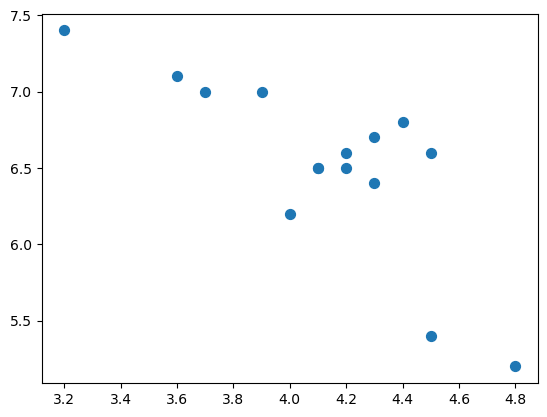

In [3]:
plt.scatter(Arr1, Arr2, s=50)

### Делаем предположение о наличии линейной зависимости

In [4]:
# Проверяем на «нормальность»
stat, p = stats.shapiro(Arr1) # Тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.7654224038124084
Принять гипотезу о нормальности


In [5]:
# Проверяем на «нормальность»
stat, p = stats.shapiro(Arr2) # Тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.06935626268386841
Принять гипотезу о нормальности


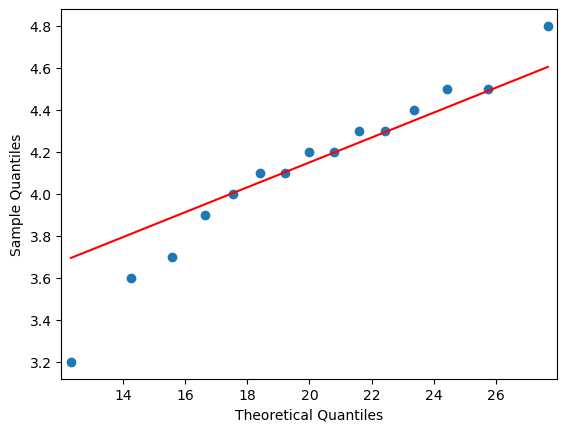

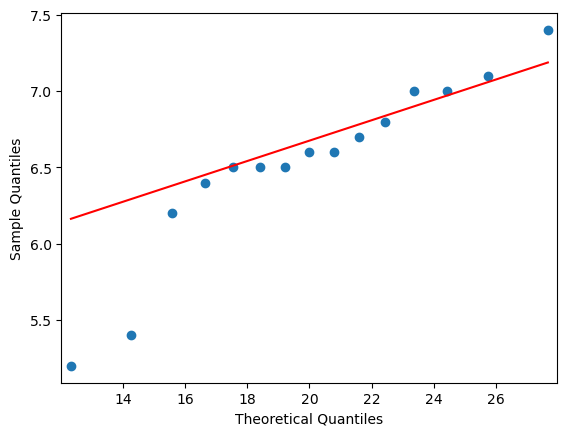

In [6]:
fig1 = sm.qqplot(Arr1, loc = 20, scale = 5 ,  line='q')
fig2 = sm.qqplot(Arr2, loc = 20, scale = 5 ,  line='q')

In [7]:
# Рассчитываем коэффициент корреляции Пирсона
pearsonr(Arr1, Arr2)

PearsonRResult(statistic=-0.7812720042875795, pvalue=0.0005833501931244003)

## Так как p - value < 0.05, то на уровне значимости 0,05 делаем вывод о статистической значимости коэффициента корреляции. Между первым и вторым массивами существует линейная положительная связь.

In [8]:
Anxiety_level_ranks = np.array([12, 11, 1, 2, 4, 7, 9, 15, 14, 10, 3, 5, 8, 6, 13])
Aggressiveness_level_ranks = np.array([14, 13, 4, 3, 5, 6, 11, 12, 10, 9, 1, 7, 2, 8, 15])

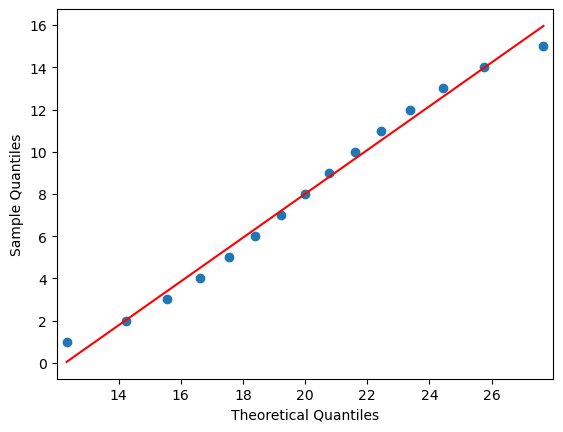

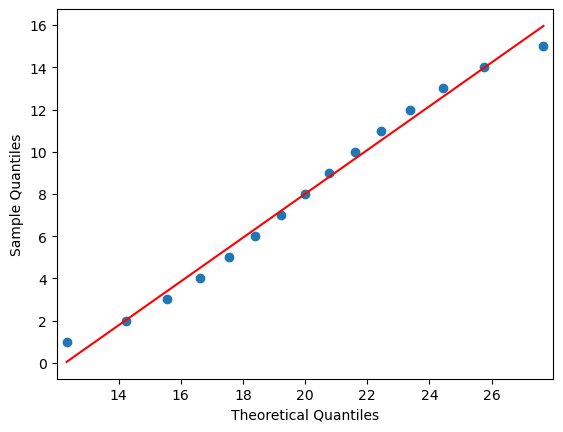

In [9]:
fig1 = sm.qqplot(Anxiety_level_ranks, loc = 20, scale = 5 ,  line='q')
fig2 = sm.qqplot(Aggressiveness_level_ranks, loc = 20, scale = 5 ,  line='q')

In [10]:
spearmanr(Anxiety_level_ranks, Aggressiveness_level_ranks)

SignificanceResult(statistic=0.8178571428571428, pvalue=0.0001951365470631984)

Ранговый коэффициент корреляции Спирмена равен 0,818, что говорит о тесной и прямой связи между уровнем тревожности и агрессивности у подростков. На уровне значимости 0,05 отвергаем нулевую гипотезу и делаем вывод о статистической значимости коэффициента ранговой корреляции.

In [11]:
stats.kendalltau(Anxiety_level_ranks, Aggressiveness_level_ranks)

SignificanceResult(statistic=0.6380952380952382, pvalue=0.0005320215605847219)

Критическое значение коэффицента корелляции Кендалла по таблице равно 2,16037.
Ранговый коэффициент корреляции Кендалла равен 0,64. На уровне значимости 0,05 отвергаем нулевую гипотезу и делаем вывод о статистической значимости коэффициента ранговой корреляции.

## В следующей задаче нужно выянить взаимосвязь уровня зарплат с наличием высшего образования. Так как шкала дихотомическая, то уровень образования в случае да принимаем за 1, в случае нет за 0.

In [12]:
Salary_level = np.array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0])
Higher_education = np.array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [13]:
# Рассчитываем коэффициент корреляции Пирсона
pearsonr(Salary_level, Higher_education)

PearsonRResult(statistic=0.4082482904638629, pvalue=0.2415039719130602)

# Таким образом, коэффициент корреляции Пирсона для дихотомической шкалы равен 0,408, то есть зависимость между уровнем зарплат и наличием высшего образования незначительная.

In [14]:
df = pd.read_csv('DNase.csv')
df

,Unnamed: 0,Run,conc,density
0,1,1,0.048828,0.017
1,2,1,0.048828,0.018
2,3,1,0.195312,0.121
3,4,1,0.195312,0.124
4,5,1,0.390625,0.206
...,...,...,...,...
171,172,11,3.125000,0.980
172,173,11,6.250000,1.421
173,174,11,6.250000,1.385
174,175,11,12.500000,1.715


In [15]:
df.drop(columns = ['Unnamed: 0'], axis = 1)

,Run,conc,density
0,1,0.048828,0.017
1,1,0.048828,0.018
2,1,0.195312,0.121
3,1,0.195312,0.124
4,1,0.390625,0.206
...,...,...,...
171,11,3.125000,0.980
172,11,6.250000,1.421
173,11,6.250000,1.385
174,11,12.500000,1.715


In [16]:
Run = df['Run']
conc = df['conc']
density = df['density']

In [17]:
# Проверяем на «нормальность»
stat, p = stats.shapiro(Run) # Тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

6.891278303555737e-07
Отклонить гипотезу о нормальности


In [18]:
# Проверяем на «нормальность»
stat, p = stats.shapiro(conc) # Тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

4.4806411709584533e-17
Отклонить гипотезу о нормальности


In [19]:
stat, p = stats.shapiro(density) # Тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

2.2297956536743158e-10
Отклонить гипотезу о нормальности


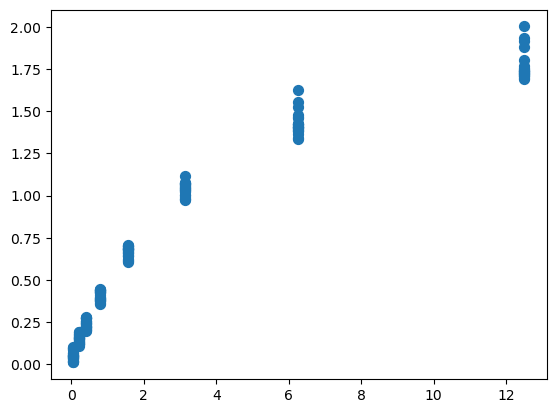

In [20]:
plt.scatter(conc, density, s=50)

По графику рассеяния видно, что при возрастании концентрации белка - увеличивается плотность. График имеет вид стпенной функции, похожую на кубический корень.

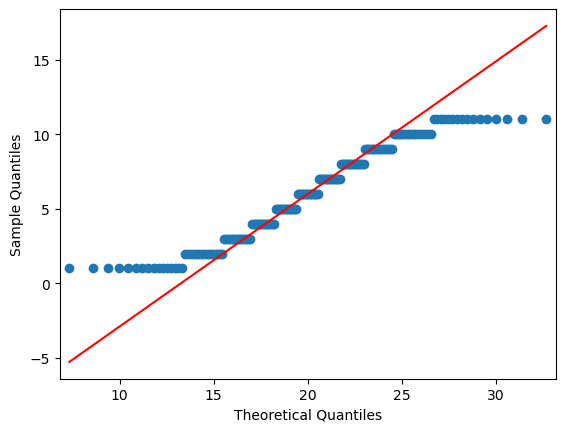

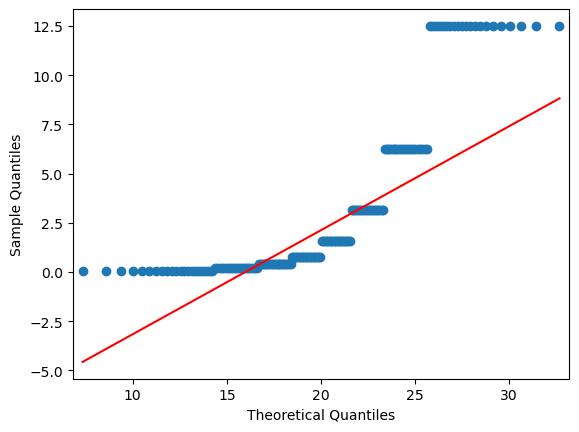

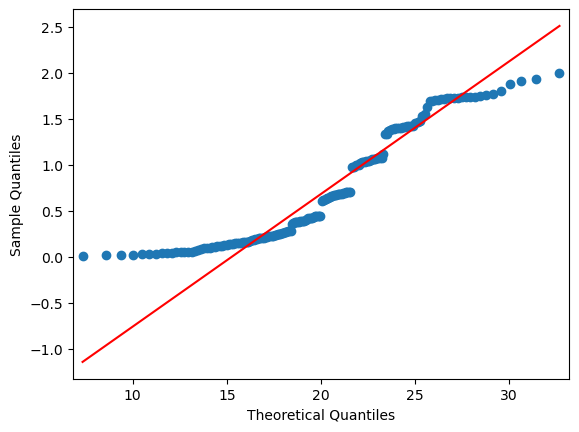

In [21]:
fig1 = sm.qqplot(Run, loc = 20, scale = 5 ,  line='q')
fig2 = sm.qqplot(conc, loc = 20, scale = 5 ,  line='q')
fig2 = sm.qqplot(density, loc = 20, scale = 5 ,  line='q')

Атрибуты не имеют нормального распределения.

In [22]:
pearsonr(conc, Run)

PearsonRResult(statistic=1.1167282376600696e-17, pvalue=0.9999999999999993)

In [23]:
pearsonr(density, Run)

PearsonRResult(statistic=-0.004438334835023955, pvalue=0.9533807187159603)

In [24]:
spearmanr(conc, Run)

SignificanceResult(statistic=0.0, pvalue=1.0)

In [25]:
spearmanr(density, Run)

SignificanceResult(statistic=0.017364322879440265, pvalue=0.8190713578660496)

In [26]:
stats.kendalltau(conc, Run)

SignificanceResult(statistic=0.0, pvalue=1.0)

In [27]:
stats.kendalltau(density, Run)

SignificanceResult(statistic=0.010191903337066582, pvalue=0.8471315412627793)

# Так как p - value > 0.05 во всех случаях, то на уровне значимости 0,05 делаем вывод о статистической значимости коэффициента корреляции. Между концентрацией и плотностью белка и упорядоченным фактором соответственно не существует линейной положительной связи. Нулевую гипотезу отвергаем.
# Предположительно плотность белка имеет незначительную связь с упорядоченым фактором, так как показало значение p - value при расчёте коэффициента корреляции Спирмена показало значение наиболее стремящееся к 0.05.